## Airbnb Data Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("airbnb_data.csv")
df.head(3)

C:\Users\debna\AppData\Local\Temp\ipykernel_16100\358398229.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airbnb_data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


## Data Cleaning

In [11]:
# Checking missing values
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [10]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [13]:
# Changing type of 'last review' from object to datetime
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [15]:
df.dtypes

id                                         int64
NAME                                      object
host id                                    int64
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                              object
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                     object
service fee                               object
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month   

In [19]:
# Replacing empty/NaT/NaN cells with 0 and min value of 'last review'
df.fillna({'reviews per month': 0, 'last review': df['last review'].min()}, inplace=True)

In [20]:
df.head(4)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN


In [21]:
# Removing rows with empty 'NAME' or 'host name' column
df.dropna(subset=['NAME', 'host name'], inplace=True)

In [22]:
df.isnull().sum()

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [26]:
# Removing columns
df.drop(columns=['license', 'house_rules'], errors='ignore', inplace=True)

In [29]:
df.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0


In [ ]:
# Removing '$' sign and converting from object to float data type
df['price'] = df['price'].replace('[\$,]','', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]','', regex=True).astype(float)

In [32]:
df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0


In [35]:
# Removing duplicated data
df.drop_duplicates(inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

## Visualization

### 1. What is the distribution of listing prices ?

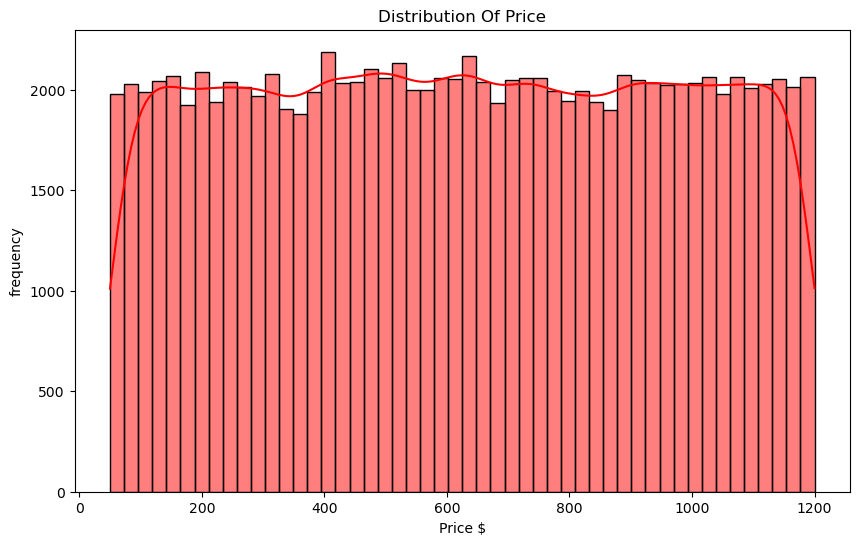

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=50, color='red', kde=True)
plt.xlabel('Price $')
plt.ylabel('frequency')
plt.title('Distribution Of Price')
plt.show()

##### The histogram shows a fairly even distribution of listing prices across different price ranges, indicating no particular concentration of listing in any specific price range. The KDE line helps visualize this even spread more clearly, confirming that the dataset contains listings with a wide variety of prices.

### 2. How are different room types distributed?

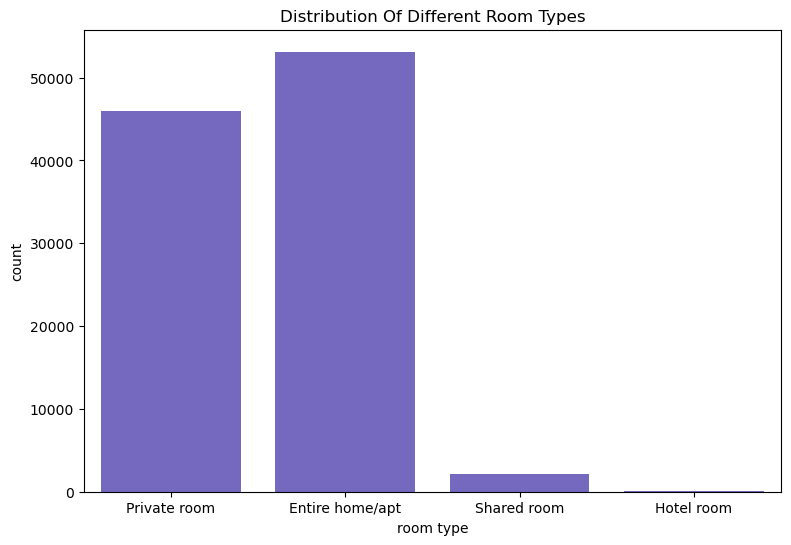

In [67]:
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='room type', color='slateblue')
plt.title('Distribution Of Different Room Types')
plt.show()

### 3. How are listing distributed across different neighbourhood?

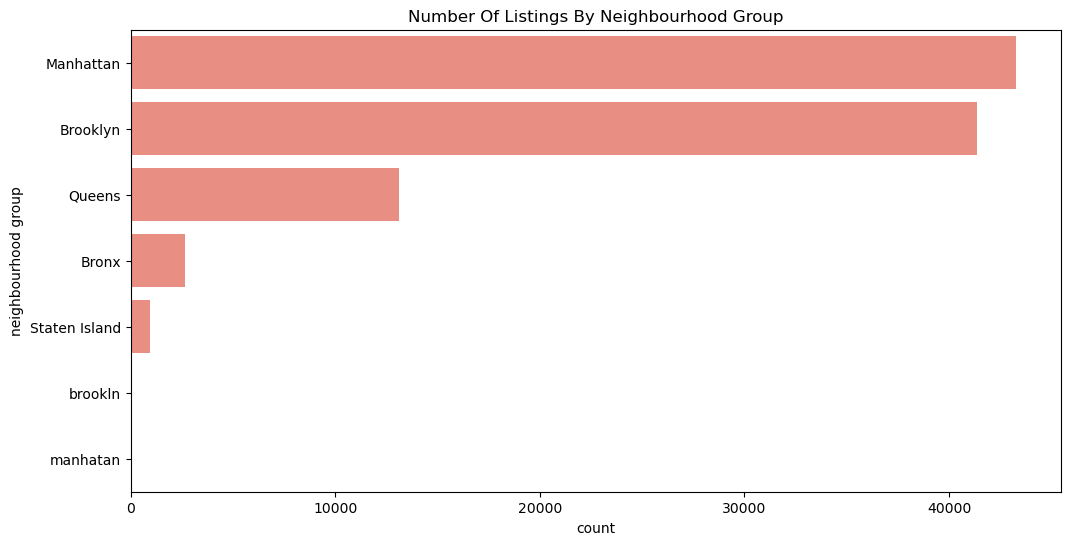

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='neighbourhood group', color='salmon', order=df['neighbourhood group'].value_counts().index)
plt.title('Number Of Listings By Neighbourhood Group')
plt.xlabel('count')
plt.ylabel('neighbourhood group')
plt.show()

##### 4. What is the relationship between price and room type?

C:\Users\debna\AppData\Local\Temp\ipykernel_16100\1322313244.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Room Type')


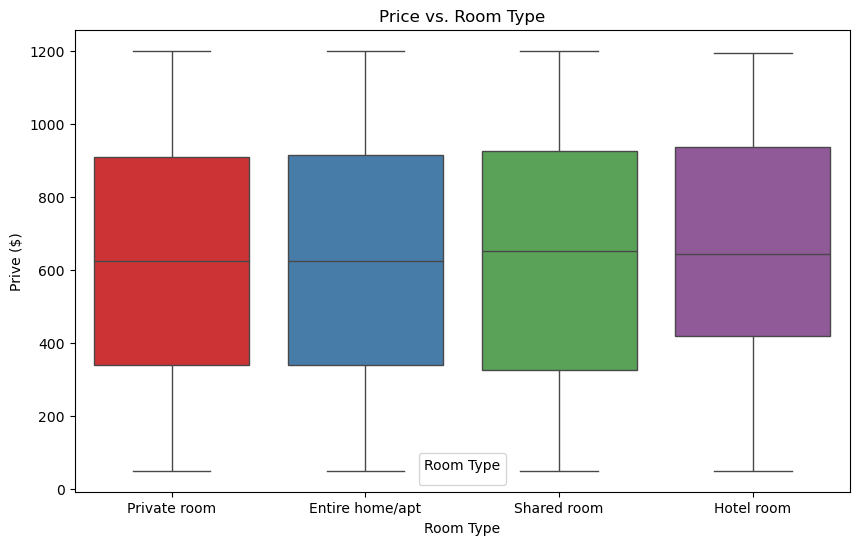

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room type', y='price', hue='room type', palette='Set1')
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Prive ($)')
plt.legend(title='Room Type')
plt.show()

##### 5. How has the number of reviews change over with time

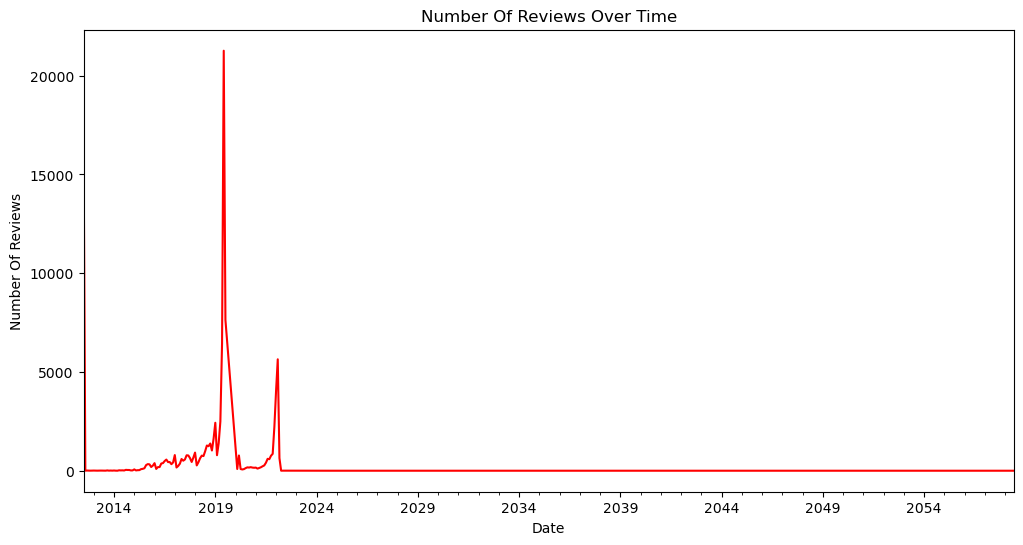

In [74]:
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line', color='red')
plt.title('Number Of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number Of Reviews')
plt.show()